In [1]:
from tensorflow.keras.models import load_model

In [2]:
maskNet = load_model("car_bike.model")
%matplotlib inline
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np


In [3]:

import os
import cv2
filename = 'image.jpg'
directory= r"C:\Users\PARTH\Desktop\advanced auto"
os.chdir(directory)
vid=cv2.VideoCapture(0)
while (True):

    # Capture the video frame
    # by frame
    ret, frame = vid.read()

    # Display the resulting frame
    cv2.imshow('frame', frame)

    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.imwrite(filename, frame)
        

        break
        
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

<PIL.Image.Image image mode=RGB size=200x200 at 0x1F8728FF128>


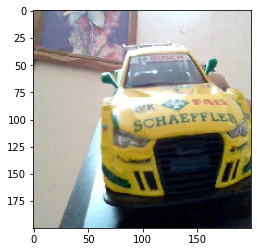

In [4]:
img1 = image.load_img(r'C:\Users\PARTH\Desktop\advanced auto\image.jpg', target_size=(200, 200))
print(img1)
plt.imshow(img1)

img = image.img_to_array(img1)
img = img/255

In [5]:
img = np.expand_dims(img, axis=0)

In [6]:
prediction = maskNet.predict(img, batch_size=None,steps=1) 

In [7]:
prediction

array([[0.97745717]], dtype=float32)

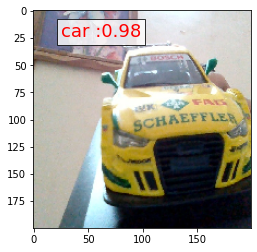

In [8]:
if(prediction[:,:]>0.5):
    value ='car :%1.2f'%(prediction[0,0])
    plt.text(25, 24,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='bike :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

In [15]:
import cv2
img = cv2.imread(r'C:\Users\PARTH\Desktop\advanced auto\bike.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (200, 200))
cv2.imshow("i",img)
cv2.waitKey(0)

# predict the move m
pred = maskNet.predict(np.array([img]))
move_code = pred[0][0]


In [16]:
print(move_code)

1.0
